# Regresyon

Bu notebook, regresyon modelleri için bir el kitabı olması amacıyla hazırlanmıştır. Teorik bilgi konusunda derinlemesine bir kavrayışta bulunulmamış, yalnızca uygulamalara ilişkin kısa bilgiler verilmiştir. Bu sebeple bu notebook'u kendi uygulamalarınız esnasında yönlendirici ve başvurulacak bir kaynak olarak görmeniz, her konsept için teorik altyapıyı oluşturduktan sonra uygulamaya geçmeniz tavsiye edilir.

Notebook içerisinde basit ve kompleks veri setleri kullanılmış olup, gerekli olduğu yerlerde pre-processing işlemlerine başvurulmuştur.

Hazırlayan: Mert Yasin Bozkır

- https://bento.me/mybozkir

## Kütüphaneler

In [1]:
# Kütüphaneler

#Genel Kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold

#Regression Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

#Preprocessing & Feature Engineering
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, PolynomialFeatures

#Pipe & Hyperparameter Tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Warnings
from warnings import filterwarnings
filterwarnings('ignore', category = DeprecationWarning)
filterwarnings('ignore', category = FutureWarning)

%matplotlib inline

<frozen importlib._bootstrap>:488: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


## Lineer Regresyon

In [14]:
df_ = pd.read_csv("../../datasets/regression/Advertising.csv")

df = df_.copy()

Kullanacağımız veri seti Advertising isimli veri seti olacak

Aşağıda görebileceğimiz üzere toplamda 200 kayıttan oluşuyor, herhangi bir şekilde eksik verisi veya yapısal bir bozukluğu bulunmuyor.

Bu veri setinde Sales değişkeni hedef değişkenimiz, diğer değişkenler ise model kurmak için kullanacağımız özelliklerimiz olacak.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [17]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [18]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Şimdi biraz görselleştirme yapalım.

Veri setimizdeki her bir değişkenin, hedef değişkenimiz ile olan ilişkisini görebilmek için regplot kullanabiliriz. Seaborn kütüphanesinden çağıracağımız regplot, kullanıldığında verilen feature (özellik) ile target variable (hedef değişken) arasında lineer regresyon modeli kurarak bu değişkenler arasındaki ilişkiyi görselleştirir.

<Axes: xlabel='Newspaper', ylabel='Sales'>

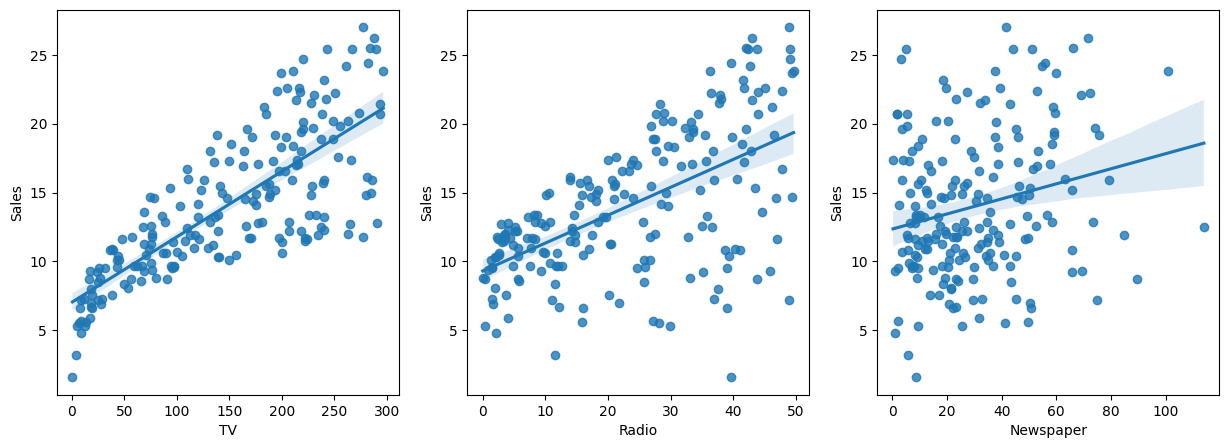

In [20]:
#Öncelikle matplotlib kütüphanesin kullanarak (15, 5) boyutlarında temel bir figür oluşturuyorum.
fig = plt.figure(figsize = (15, 5))

#Şimdi elimdeki toplam 3 adet feature'ın her birisi için bir subplot oluşturacağım.
ax1 = fig.add_subplot(1, 3, 1) #(1, 3, 1)'in anlamı şu. 1 satır, 3 sütundan oluşmasını istediğim tüm figürün 1. elemanı budur.
ax2 = fig.add_subplot(1, 3, 2) #(1, 3, 2)'nin anlamı şu. 1 satır, 3 sütundan oluşmasını istediğim tüm figürün 2. elemanı budur.
ax3 = fig.add_subplot(1, 3, 3) #(1, 3, 3)'ün anlamı şu. 1 satır, 3 sütundan oluşmasını istediğim tüm figürün 3. elemanı budur.

#Şimdi oluşturduğumuz subplotların her birisine bir regplot oluşturalım.
sns.regplot(ax = ax1, x = 'TV', y = 'Sales', data = df)        # TV ve Sales arasındaki ilişki için regplot.
sns.regplot(ax = ax2, x = 'Radio', y = 'Sales', data = df)     # Radio ve Sales arasındaki ilişki için regplot.
sns.regplot(ax = ax3, x = 'Newspaper', y = 'Sales', data = df) # Newspaper ve Sales arasındaki ilişki için regplot.

Biliyoruz ki, gözlem noktalarının dağılımları regresyon çizgisine ne kadar yakınsa, tahminim ile gerçek değerler arasındaki fark o kadar azdır.

Bu fark ne kadar azsa, tahminim ile gerçek gözlemler arasındaki hatalar da o kadar azdır. 

Hatalar ne kadar azsa, modelim o kadar başarılıdır.

Yukarıdaki her bir değişkeni gözlemlediğinizde, TV değişkeninin dağılımlarının lineer yapıya daha uygun olduğunu görebilirsiniz. En uygun olmayan ise Newspaper değişkenidir.

Eğer her bir değişken arasındaki ilişkiyi ve değişkenlerin kendi içlerindeki dağılımlarını, tek seferde bir matris yapısıyla görüntülemek istersek, pairplot kullanabiliriz.

Elimizdeki veri setinde değişken sayımız az olduğu için bu görselleştirme tekniği düzgün bir şekilde kullanılabilir fakat değişken sayısı çok fazla olursa görseli görüntülemek kolay olmayacaktır.

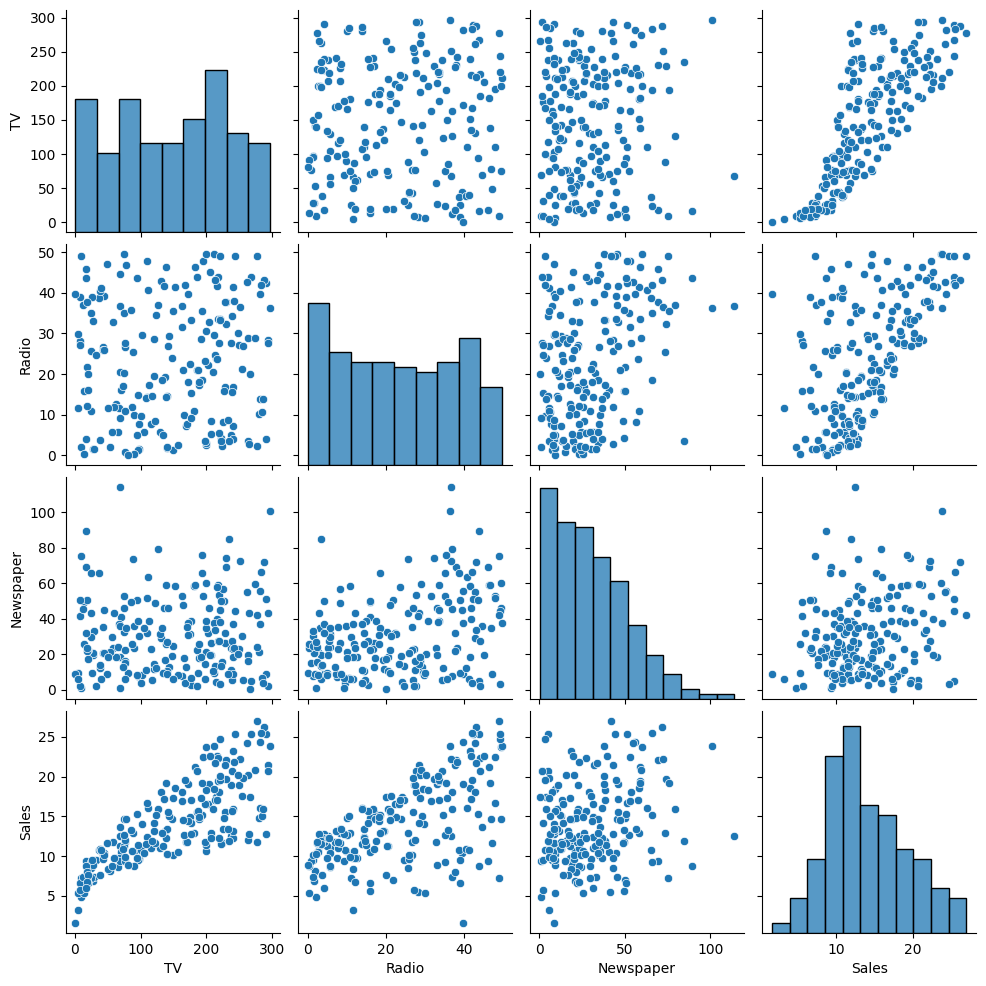

In [22]:
#Pairplot
sns.pairplot(df);

Değişkenler arasındaki korelasyonu görüntülemek için ise corr() fonksiyonuyla beraber Seaborn kütüphanesindeki heatmap fonksiyonunu birlikte kullanabiliriz.

Örneğin iki değişken arasında pozitif veya negatif yönlü olarak çok güçlü bir ilişki varsa, bu değişkenlerden birisini modelden çıkartırız çünkü bu değişkenler arasındaki güçlü ilişki modeli manipüle eder. Bu da istemediğimiz bir durumdur.

In [23]:
#Korelasyon
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Yukarıda görebileceğimiz üzere korelasyon fonksiyonu bize dataframe olarak bir matris döner, ancak bunu okuması özellikle büyük veri setlerinde çok da kolay olmadığı için görsel bir teknik olarak ısı haritası (heatmap) kullanırız.

Aşağıda oluşturduğumuz ısı haritasında, TV ve Sales arasındaki yüksek ilişki katsayısı (0.78) dikkatinizi çekmiş olmalı.

Bu zaten regplot kullandığımızda gözlemlediğimiz bir durumdu. Model kurarken Sales değişkenimiz (hedef değişken olduğu için) ayrı tutulacağı için bir problem teşkil etmiyor. Bizim için önemli olan model kurmak için kullanacağımız hedef değişkenler arasındaki ilişkinin katsayıları olacak.

<Axes: >

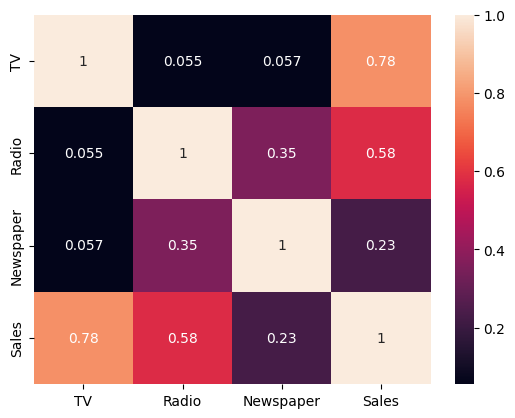

In [24]:
sns.heatmap(df.corr(), annot = True)

Şimdi elimizdeki veri setini önce X ve y olarak Features ve Target Value şeklinde ayıralım.

Not: Şu ana kadar örneğin Features'ı "model kurmak için kullanacağımız özellikler" şeklinde, Target Values'u ise "hedef değişken" şeklinde kullandığım durumlar oldu. Ancak bundan sonra bu tip teknik terimleri İngilizce haliyle kullanacağım. Bunun sebebi, genel kullanımda jargon haline gelmiş olmalarının yanı sıra, literatür araştırmalarında bu isimleri bu haliyle bilmenizin gerekliliğidir.

In [25]:
# Features
X = df.drop(columns = ['Sales'], axis = 1)

# Target Values
y = df['Sales']

In [27]:
# Görebileceğimiz üzere, X setimde hedef değişkenim y yok.

X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [29]:
# Hedef değişkeni Series olarak aldığımız için, bir DataFrame fonksiyonu olan head() ile görüntüleme yapamayız. Bu yüzden basitçe ilk 5 index'i görüntülüyoruz.
y[:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

Şimdi train/test split işlemini gerçekleştirerek, train seti ile veri setimizi eğitelim ve test setimizdeki performans sonuçlarına bakalım.

Train seti ile eğittiğimiz veri seti, test setinde ne kadar başarılı olursa bizim için o kadar iyidir.

In [30]:
# Veri setimin %25'ini test seti olarak ayırmak istiyorum. Kullandığımız fonksiyon veri seti içerisinden random seçimler yaparak ayırma işlemini gerçekleştirir.
# Benimle aynı seçimleri yapmak ve sonuçlara ulaşmak için random_state parametresine 42 değerini verin. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Ayırdığımız setlerin boyutlarına bakalım.

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

Şimdi artık Linear Regression modelini kurmanın vakti geldi.

In [31]:
# Model instance'ını oluşturalım ve bir değişkende tutalım. Değişken ismini istediğiniz gibi yapabilirsiniz, hangi modeli tuttuğunuzu bilin yeterli.

linreg = LinearRegression()

In [32]:
# Modelimizi X_train ve y_train ile fit edelim. Bu sayede model, hangi X değerleri için hangi y değerleri elde ediliyor bunu öğrenecek.

linreg.fit(X_train, y_train)

LinearRegression()

Kurmuş olduğumuz modelin intercept ve coefficient değerlerini görebiliriz.

In [37]:
# Intercept

print('Intercept değeri:', linreg.intercept_)

# Ufak bir ayraç

print('------------' * 5)

# Coefficients

print('Coefficient değerleri:', linreg.coef_)

Intercept değeri: 2.7783034602452847
------------------------------------------------------------
Coefficient değerleri: [0.04543356 0.19145654 0.00256809]


Yukarıda görebildiğimiz üzere, modelimiz 2.77 değerinden başlayarak, coefficient değerlerini kullarak oluşturduğu bir çizgi oluşturacak.

Coefficient içerisindeki değerler sırasıyla X değişkeninde tuttuğumuz değerlerin katsayısını ifade eder. Bunu görüntüleyebiliriz.

In [38]:
df_coeff = pd.DataFrame(linreg.coef_, X.columns, columns = ['Coefficients'])

df_coeff

,Coefficients
TV,0.045434
Radio,0.191457
Newspaper,0.002568


Örneğin televizyona 250, radyoya 45, gazeteye de 100 birim para yatırmak istiyoruz. Bu yatırımın karşılığında satışlarımız kaç birim olur?

Bunu predict yaparak öğrenebiliriz.

In [39]:
# Yatırım değerlerimi, basitçe iki boyutlu olarak ifade ettim. Unutmayın, hangi özelliğe hangi yatırım değerini koymak istiyorsam aynı sırada olmalı.
values = [[250, 45, 100]]

In [40]:
# Şimdi tahmin edelim.

linreg.predict(values)

c:\Users\myboz\development\mybozkir\mybozkirenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([23.0090463])

Görebileceğimiz üzere bu yatırım değerleriyle 23 küsür birimlik bir satış yakalıyoruz.

values setimize başka bir tahmin seti daha girelim ve sonuçlara bakalım.

In [41]:
values = [[250, 45, 100], [349,54,10]]

linreg.predict(values)

c:\Users\myboz\development\mybozkir\mybozkirenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([23.0090463 , 28.99894925])

Görebileceğimiz üzere ikinci setimiz 28.99'luk bir satış değeri yakaladı.

Bunlar modelimizin eğitildiği veriye göre ortaya koyduğu tahminler. Ancak bu tahminlerin ne kadar isabetli olduğunu henüz bilmiyoruz.

Şimdi modelimizin tahmin performansını görmenin vakti geldi.

Test setine geçiş yapmadan önce, train setimize bir tahmin işlemi uygulatıp gerçek değerleri ile karşılaştıralım, bakalım nasıl sonuçlar gelmiş.

In [44]:
# Modelime X_train setimdeki değerleri vererek her bir gözlem için tahmin oluşturmasını istiyorum.
predicts = linreg.predict(X_train)

# Oluşturduğu tahmin değerlerinin ilk 10 adedini gözlemleyelim.
predicts[:10]

array([15.37997274, 11.8215277 , 12.72840682, 10.71028985,  6.44060031,
        9.82908944,  9.40101614, 24.1705031 ,  7.56073512, 12.44122425])

In [45]:
# Şimdi tahmin değerlerimiz ile gerçek değerleri kıyaslayarak aralarındaki farkları görelim.
comp = pd.DataFrame({
    'Actual' : y_train,
    'Predicts' : predicts,
    'Residuals' : (y_train - predicts) 
})

comp

,Actual,Predicts,Residuals
114,14.6,15.379973,-0.779973
173,11.7,11.821528,-0.121528
5,7.2,12.728407,-5.528407
126,6.6,10.710290,-4.110290
117,9.4,6.440600,2.959400
...,...,...,...
106,7.2,6.096437,1.103563
14,19.0,18.468345,0.531655
92,19.4,19.234500,0.165500
179,12.6,12.261865,0.338135


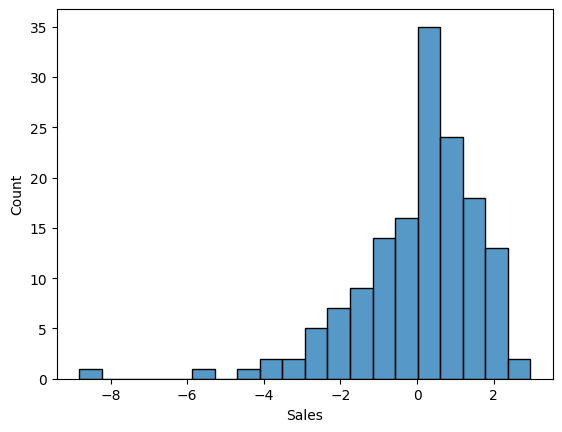

In [48]:
# Farkları (residuals) histogram ile görselleştirmek isteyebiliriz.
sns.histplot((y_train - predicts), bins = 20);

Şimdi sıra esas test işlemini yapmaya geldi. Görebilmeniz açısından modelimi tekrar eğiteceğim ve test setindeki performansına bakacağım.

Bunun için train setinde Cross Validation uygulayarak train performansına bakacağız. Test setinde ise R-Square, MAE ve RMSE değerlerini göreceğiz.

In [51]:
# Model Eğitim
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Test Seti Üzerinde Tahmin
y_pred = linreg.predict(X_test)

#R-Square (R2)
r2 = r2_score(y_test, y_pred)

#Mean Squared Error (MSE) & Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

#Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('MSE Score:', mse)
print('RMSE Score:', rmse)
print('MAE Score:', mae)

R2 Score: 0.8935163320163658
MSE Score: 2.880023730094192
RMSE Score: 1.6970632663793628
MAE Score: 1.402312498938507


Yukarıda görebileceğimiz üzere, lineer regresyon ile %89'luk bir isabet oranıyla tahmin yapabiliyoruz.

Peki bu kullandığımız metrikler tam olarak ne ifade ediyorlar? Bunu da aşağıda basitçe incelemiş olalım zira tüm regresyon teknikleri için bu performans metriklerini kullanacağız.

Regresyon modelleri için kullandığımız 3 yaygın performans metriği vardır:

**Mean Absolute Error** (MAE) hataların mutlak değerlerinin ortalamasını verir:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) hataların karelerinin ortalamasını verir:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) hataların karelerinin ortalamasının karekökünü verir:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$


Peki bu metrikler ne ifade ederler?

- **MAE** ortalama hatayı verdiği için anlaması en kolay olanıdır.
- **MSE** karelerin ortalamasını aldığı için büyük hataları daha çok cezalandırır, bu nedenle gerçek hayat problemlerine daha uygundur.
- **RMSE** y biriminde yorumlanabileceği için MSE'den daha popüler gözükmektedir.


Bu metiklerin hepsi **kayıp fonksiyonlarıdır**, çünkü bunları minimize etmek isteriz.

R-Square değeri ise maksimize etmek istediğimiz bir değerdir.